## Общая информация

**Срок сдачи:** 5 апреля 2022, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.spatial.distance import cdist, pdist

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score

### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='minkowski'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        if self.algorithm == 'kd_tree':
            self.KDTree = KDTree(X, metric=self.metric)
    
    def predict(self, X):
        if (self.algorithm == 'brute'):
            distances = cdist(X, self.X_train, metric=self.metric)
            classes = self.y_train[np.argpartition(distances, self.n_neighbors, axis=1)[:, :self.n_neighbors]]
        if (self.algorithm == 'kd_tree'):
            classes = self.y_train[self.KDTree.query(X, k=self.n_neighbors, return_distance=False, sort_results=False)]
        return np.apply_along_axis(lambda neighbors_classes: np.bincount(neighbors_classes).argmax(), 1, classes)
        
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
my_clf.fit(X_train, y_train)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 2 (0.5 балла)

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
timeit.timeit('clf.fit(X_train, y_train)', number=10000, globals=({'clf' : clf, 'X_train' : X_train, 'y_train' : y_train}))

1.1176888000000016

In [9]:
timeit.timeit('my_clf.fit(X_train, y_train)', number=10000, globals=({'my_clf':my_clf, 'X_train':X_train, 'y_train':y_train}))

0.002161600000000874

In [10]:
timeit.timeit('clf.predict(X_test)', number=10000, globals=({'clf':clf, 'X_test':X_test}))

6.831784799999999

In [11]:
timeit.timeit('my_clf.predict(X_test)', number=10000, globals=({'my_clf':my_clf, 'X_test':X_test}))

1.1204037999999983

### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
timeit.timeit('clf.fit(X_train, y_train)', number=10000, globals=({'clf' : clf, 'X_train' : X_train, 'y_train' : y_train}))

2.0660092999999975

In [15]:
timeit.timeit('my_clf.fit(X_train, y_train)', number=10000, globals=({'my_clf':my_clf, 'X_train':X_train, 'y_train':y_train}))

0.7872261000000016

In [16]:
timeit.timeit('clf.predict(X_test)', number=10000, globals=({'clf':clf, 'X_test':X_test}))

7.015702599999997

In [17]:
timeit.timeit('my_clf.predict(X_test)', number=10000, globals=({'my_clf':my_clf, 'X_test':X_test}))

1.4647754999999947

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 4 (2.5 балла)

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = np.asarray(newsgroups['data'])
target = np.asarray(newsgroups['target'])

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
CVVectorizer = CountVectorizer(stop_words = 'english', min_df=200, max_df=500)
TfVectorizer = TfidfVectorizer(stop_words = 'english', min_df=200, max_df=500)
data_CVVector = CVVectorizer.fit_transform(data).toarray()
data_TfVector = TfVectorizer.fit_transform(data).toarray()

words = np.asarray(TfVectorizer.get_feature_names())

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [22]:
def cross_valid_score(Data, Target, n_neighbors, algorithm='brute', metric='minkowski', folds=3):
    kfold = KFold(n_splits=folds, shuffle=True, random_state=1)
    sum = 0
    my_clf = MyKNeighborsClassifier(n_neighbors=n_neighbors, algorithm=algorithm, metric=metric)
    for train, test in kfold.split(Data):
        my_clf.fit(Data[train], Target[train])
        score = accuracy_score(Target[test], my_clf.predict(Data[test]))
        sum += score
    return sum/folds

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [24]:
acc_CV_Mi = [cross_valid_score(data_CVVector, target, i, algorithm='kd_tree', metric='minkowski', folds=3) for i in range(1, 11)]

In [25]:
acc_CV_Co = [cross_valid_score(data_CVVector, target, i, algorithm='brute', metric='cosine', folds=3) for i in range(1, 11)]

In [26]:
acc_Tfv_Mi = [cross_valid_score(data_TfVector, target, i, algorithm='kd_tree', metric='minkowski', folds=3) for i in range(1, 11)]

In [27]:
acc_TfV_Co = [cross_valid_score(data_TfVector, target, i, algorithm='brute', metric='cosine', folds=3) for i in range(1, 11)]

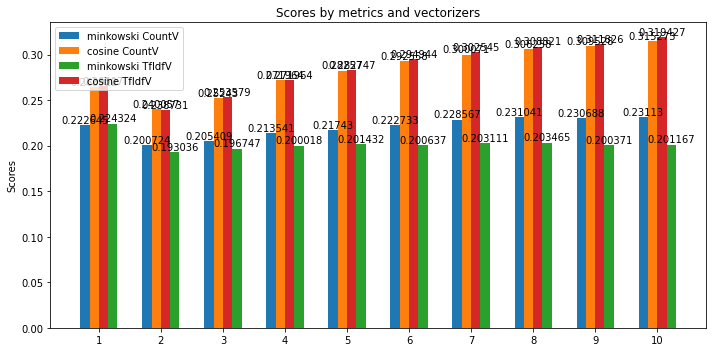

In [29]:
labels = np.arange(1, 11)

x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
rects_m_cv = ax.bar(x - 3*width/2, acc_CV_Mi, width, label='minkowski CountV')
rects_c_cv = ax.bar(x - width/2, acc_CV_Co, width, label='cosine CountV')
rects_m_tv = ax.bar(x + 3*width/2, acc_Tfv_Mi, width, label='minkowski TfIdfV')
rects_c_tv = ax.bar(x + width/2, acc_TfV_Co, width, label='cosine TfIdfV')

ax.set_ylabel('Scores')
ax.set_title('Scores by metrics and vectorizers')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects_c_cv)
ax.bar_label(rects_m_cv)
ax.bar_label(rects_c_tv)
ax.bar_label(rects_m_tv)

fig.tight_layout()

plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [34]:
#Итоговая точность низкая, потому что я сильно отфильтровал вектор, чтобы успеть по времени к дедлайну
#Но общая тенденция точности видна хорошо: косинусная метрика точнее, но медленнее;
#Применение TfIdf векторизации показывает большую точность по сравнению с CV векторизацией
#При TfIdf векторизации, 10 соседях, на косинусной метрике классификатор показывает наибольшую точность
my_clf = MyKNeighborsClassifier(n_neighbors=10, algorithm='brute', metric='cosine')
my_clf.fit(data_TfVector, target)

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [35]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])
test_data = np.asarray(newsgroups['data'])
test_target = np.asarray(newsgroups['target'])

In [36]:
#Решение проблемы разного набора слов в train и test части
temp_data_TfVector = TfVectorizer.fit_transform(test_data).toarray()
test_words = np.asarray(TfVectorizer.get_feature_names())
ind_words_train_test = np.where(np.isin(words, test_words))[0]
ind_words_test_train = np.where(np.isin(test_words, words))[0]
test_data_TfVector = np.zeros((test_data.shape[0], words.shape[0]))
test_data_TfVector[:, ind_words_train_test] = temp_data_TfVector[:, ind_words_test_train]

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [37]:
my_predict = my_clf.predict(test_data_TfVector)
accuracy_score(test_target, my_predict)

0.17511949017525225

In [ ]:
#Итоговая точность на test части датасета оказалась немного меньше, чем точность кросс-валидации.
#Мне кажется, это следствие от переобучения модели.